In [2]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [8]:
X.shape

(150, 4)

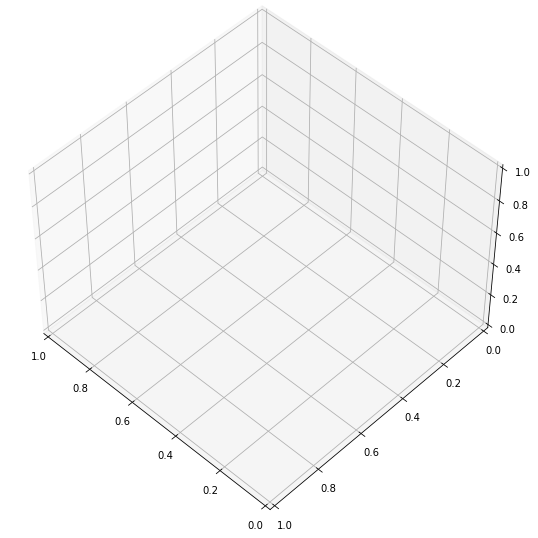

In [18]:
fig = plt.figure(1, figsize = (10,7))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

In [20]:
pca = decomposition.PCA(n_components = 3)
pca.fit(X)

PCA(n_components=3)

In [22]:
X = pca.transform(X)

In [24]:
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
    X[y == label, 1].mean() + 1.5,
    X[y == label, 2].mean(), name,
    horizontalalignment='center',
    bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components = 2)
X_r = pca.fit(X).transform(X)

In [43]:
lda = LinearDiscriminantAnalysis(n_components = 2)
X_r2 = lda.fit(X,y).transform(X)

In [44]:
print('explained variance ratio (first two components): %s'% str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.92946326 0.05334452]


In [46]:
target_names = iris.target_names

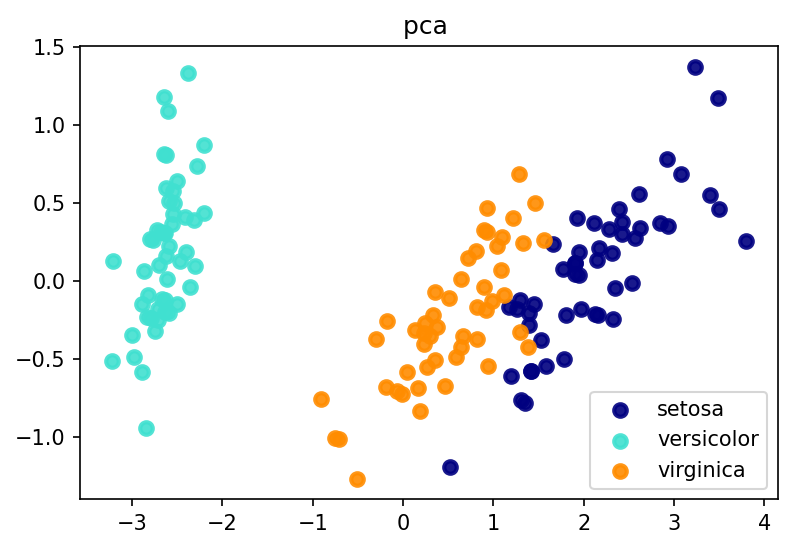

In [54]:
plt.figure(dpi = 150)
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for colors,i,target in zip(colors,[0,1,2],target_names):
    plt.scatter(X_r[y == i,0],X_r[y == i,1],color = colors,lw = lw,alpha = .9,label = target)
plt.legend(loc = 'best',shadow = False)
plt.title("pca ")
plt.show()

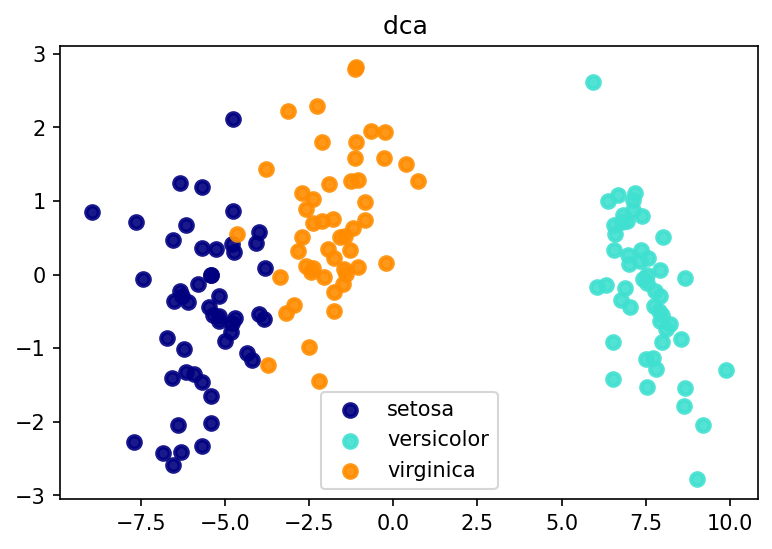

In [60]:
plt.figure(dpi = 150)
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for colors,i,target in zip(colors,[0,1,2],target_names):
    plt.scatter(X_r2[y == i,0],X_r2[y == i,1],color = colors,lw = lw,alpha = .9,label = target)
plt.legend(loc = 'best',shadow = False)
plt.title("dca ")
plt.show()

In [61]:
from scipy import signal
from sklearn.decomposition import FastICA,PCA

In [62]:
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)
s1 = np.sin(2 * time) # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time)) # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time) # Signal 3: saw tooth signal
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape) # Add noise
S /= S.std(axis=0) # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]]) # Mixing matrix
X = np.dot(S, A.T) # Generate observations